In [47]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("../data/spotify_churn.csv")
df.head()


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [48]:
# Basic info
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   str    
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   str    
 4   subscription_type      8000 non-null   str    
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   str    
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), str(4)
memory usage: 750.1 KB


,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [49]:
# Check missing values
df.isnull().sum()


user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [50]:
# ===============================
# Safe missing value handling
# ===============================

for col in df.columns:
    if df[col].dtype == 'object':
        # Fill categorical columns with mode
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
    else:
        # Fill numeric columns with median
        # Only if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)


In [51]:
# Encode categorical variables safely
label_encoders = {}
for col in df.select_dtypes(include='str').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [52]:
# Split features and target
X = df.drop('is_churned', axis=1)  # Correct target column
y = df['is_churned']

#  Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Check shapes
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (6400, 11)
X_test_scaled shape: (1600, 11)
y_train shape: (6400,)
y_test shape: (1600,)


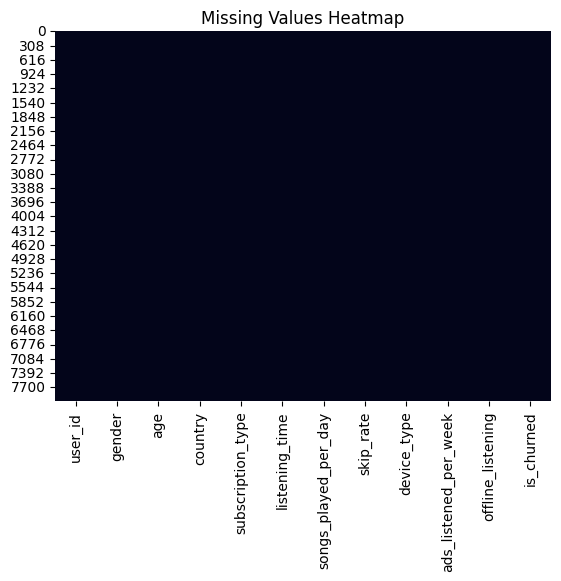

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.savefig("../results/plots/missing_values_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


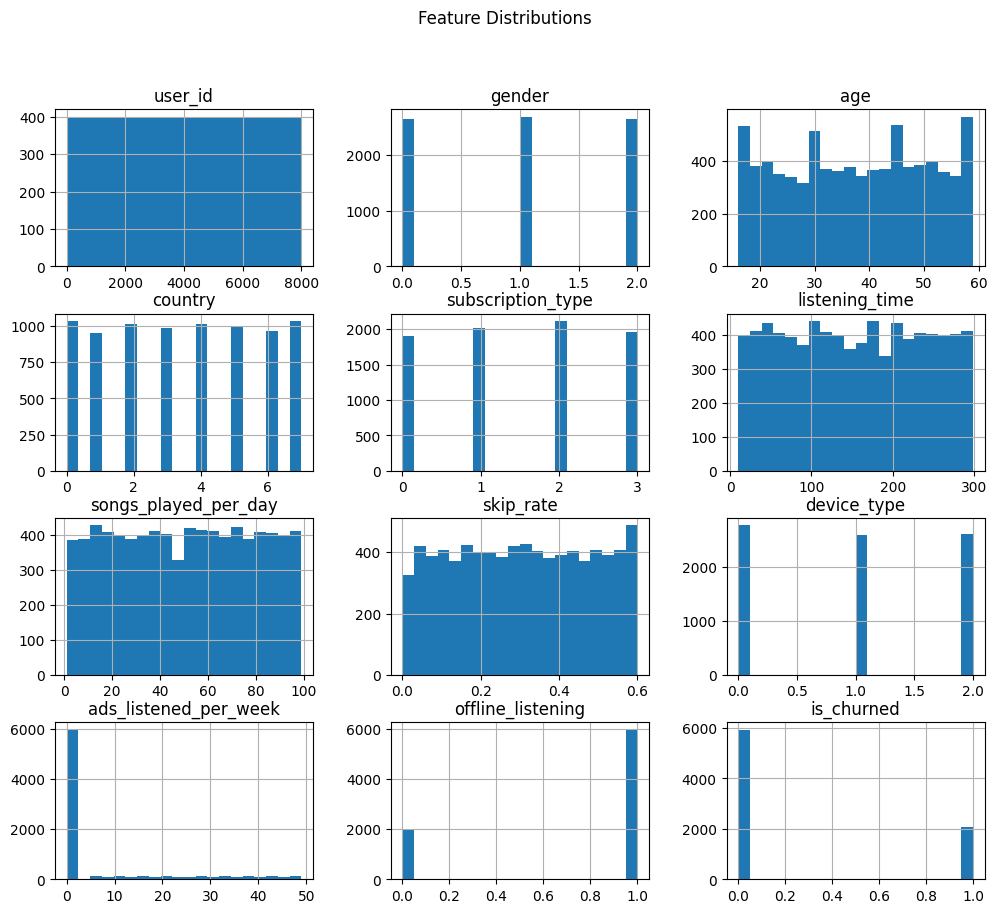

In [58]:
df.hist(bins=20, figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.savefig("../results/plots/feature_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


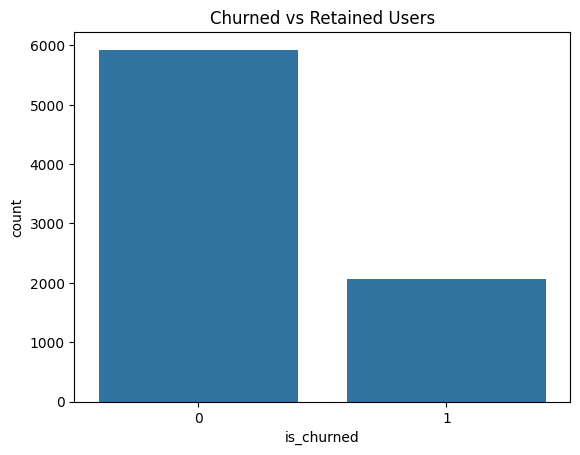

In [59]:
sns.countplot(x='is_churned', data=df)
plt.title("Churned vs Retained Users")
plt.savefig("../results/plots/churned_vs_retained_users.png", dpi=300, bbox_inches='tight')
plt.show()
